In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import sklearn

In [4]:
from sklearn.feature_extraction import DictVectorizer

In [5]:
from sklearn.linear_model import LinearRegression

In [37]:
from sklearn.metrics import mean_squared_error

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
pd.__version__

'2.1.4'

In [8]:
sklearn.__version__

'1.2.2'

!pip install pyarrow

## Q1. Downloading the data

In [10]:
df = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet")

In [11]:
import sklearn

In [12]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [13]:
initial_count = len(df)

In [14]:
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)

In [15]:
df["duration"] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply( lambda td: td.total_seconds() /60)

In [16]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0,19.800000
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,6.600000
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0,17.916667
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0,8.300000
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0,6.100000


In [17]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [18]:
df.duration.describe(percentiles = [0.95,0.98, 0.99])

count    2.964624e+06
mean     1.561295e+01
std      3.485105e+01
min     -1.356667e+01
50%      1.163333e+01
95%      3.793333e+01
98%      5.100000e+01
99%      6.045000e+01
max      9.455400e+03
Name: duration, dtype: float64

## Q2. Computing duration

In [19]:
std_dev_duration = df.duration.std()
print(f"Standard Deviation for Duration: {std_dev_duration}")

Standard Deviation for Duration: 34.851053592192876


## Q3. Dropping outliers


In [20]:
((df.duration >= 1) & (df.duration <= 60)).mean()

0.9778326020432945

In [21]:
filtered_df = df[(df.duration >= 1) & (df.duration <= 60)]

In [22]:
filtered_count = len(filtered_df)

fraction_left = filtered_count / initial_count

print(f"Fraction of records left after dropping outliers: {fraction_left:.2f}")


Fraction of records left after dropping outliers: 0.98


/home/codespace/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


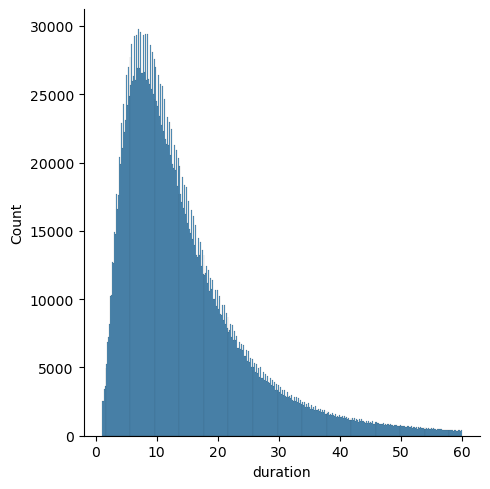

In [23]:
sns.displot(filtered_df.duration)

In [24]:
filtered_df.keys()

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'duration'],
      dtype='object')

## Q4. One-hot encoding


In [25]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [26]:
filtered_df.loc[:, categorical] = filtered_df[categorical].astype(str)

In [27]:
filtered_df[categorical+numerical].iloc[:10].to_dict(orient="records")

[{'PULocationID': '186', 'DOLocationID': '79', 'trip_distance': 1.72},
 {'PULocationID': '140', 'DOLocationID': '236', 'trip_distance': 1.8},
 {'PULocationID': '236', 'DOLocationID': '79', 'trip_distance': 4.7},
 {'PULocationID': '79', 'DOLocationID': '211', 'trip_distance': 1.4},
 {'PULocationID': '211', 'DOLocationID': '148', 'trip_distance': 0.8},
 {'PULocationID': '148', 'DOLocationID': '141', 'trip_distance': 4.7},
 {'PULocationID': '138', 'DOLocationID': '181', 'trip_distance': 10.82},
 {'PULocationID': '246', 'DOLocationID': '231', 'trip_distance': 3.0},
 {'PULocationID': '161', 'DOLocationID': '261', 'trip_distance': 5.44},
 {'PULocationID': '113', 'DOLocationID': '113', 'trip_distance': 0.04}]

In [28]:
train_dicts = filtered_df[categorical+numerical].to_dict(orient="records")

In [29]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [30]:
X_train

<2898906x519 sparse matrix of type '<class 'numpy.float64'>'
	with 8696718 stored elements in Compressed Sparse Row format>

In [31]:
targe= 'duration'
y_train = filtered_df[targe].values

In [32]:
y_train

array([19.8       ,  6.6       , 17.91666667, ..., 19.        ,
       17.85      , 15.08333333])

## Q5. Training a model


In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(X_train)

/home/codespace/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


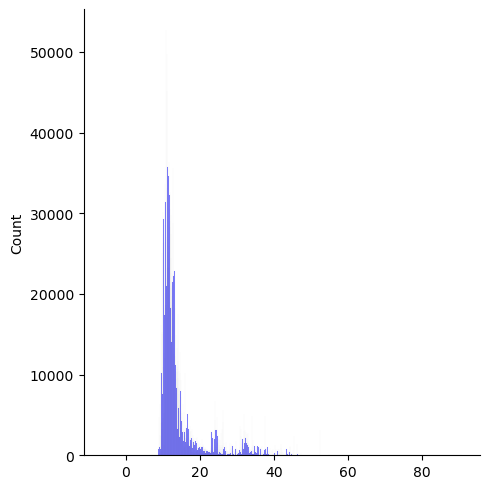

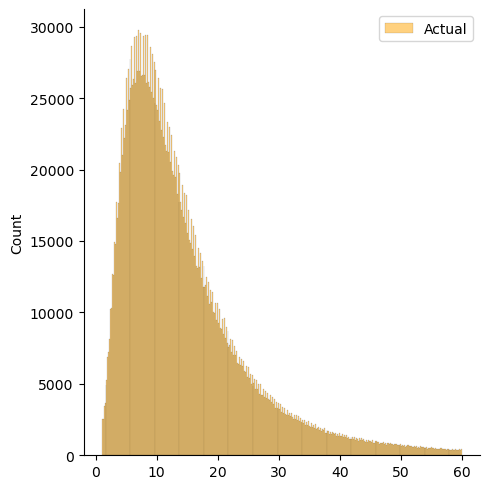

In [36]:
sns.displot(y_pred, label="Prediction", color='blue', alpha=0.5)
sns.displot(y_train, label="Actual", color='orange', alpha=0.5)
plt.legend()

## Q6. Evaluating the model


In [38]:
mean_squared_error(y_train, y_pred, squared=False)

7.952144733614916